In [1]:
import random
import numpy as np

In [2]:
def drawCard(maxDraw):
    op6, rateUp1, rateUp2 = 0, 0, 0
    result = []
    zc = 0
    bonus = 0
    for i in range(maxDraw):
        r = random.random()
        rate = 0.02 + bonus
        if r<= rate:
            zc = 0
            bonus = 0
            op6 +=1
            if r<= (rate*0.25):
                rateUp1 += 1
            if r> (rate*0.25) and r <= (rate*0.5):
                rateUp2 += 1
        else:
            zc += 1
            if zc >= 50:
                bonus += 0.02
        result.append([i+1,op6,rateUp1,rateUp2])
    return result

In [3]:
def averageRate(maxDraw, times):
    averageResult = []
    tt = []
    #tt = numpy.array([0,0,0,0])
    for i in range(times):
        result = drawCard(maxDraw)
        for r in result:
            tt += r
    tta = np.array(tt).reshape((times*maxDraw),4)
#     print(tta)
#     print(tta.shape)
    n = 0
    result = np.zeros((maxDraw,4))
    for i in range(maxDraw):
        #print ((tta[(np.where(tta[:,0]==i+1))]).tolist())
        li = (tta[(np.where(tta[:,0]==i+1))]).tolist()
        temp = np.array([0,0,0,0])
        
        for n in li:
            temp += np.array(n)
        result[i] = temp/times
    return result

In [4]:
maxDraw = int(input('Max draw:'))
times = int(input('Repeat times:'))
print (averageRate(maxDraw, times))

Max draw: 10
Repeat times: 10


[[ 1.   0.1  0.1  0. ]
 [ 2.   0.1  0.1  0. ]
 [ 3.   0.1  0.1  0. ]
 [ 4.   0.1  0.1  0. ]
 [ 5.   0.1  0.1  0. ]
 [ 6.   0.3  0.3  0. ]
 [ 7.   0.3  0.3  0. ]
 [ 8.   0.3  0.3  0. ]
 [ 9.   0.3  0.3  0. ]
 [10.   0.3  0.3  0. ]]


In [5]:
df = averageRate(200,100000)
print (df)

[[1.00000e+00 1.96500e-02 4.66000e-03 4.97000e-03]
 [2.00000e+00 3.90100e-02 9.08000e-03 9.93000e-03]
 [3.00000e+00 5.91800e-02 1.41400e-02 1.52100e-02]
 [4.00000e+00 7.94300e-02 1.87900e-02 2.06100e-02]
 [5.00000e+00 9.93800e-02 2.38900e-02 2.55300e-02]
 [6.00000e+00 1.19180e-01 2.88400e-02 3.06000e-02]
 [7.00000e+00 1.39590e-01 3.38400e-02 3.57900e-02]
 [8.00000e+00 1.59350e-01 3.89100e-02 4.06500e-02]
 [9.00000e+00 1.79420e-01 4.41200e-02 4.55100e-02]
 [1.00000e+01 1.99190e-01 4.88200e-02 5.03800e-02]
 [1.10000e+01 2.18770e-01 5.37500e-02 5.52500e-02]
 [1.20000e+01 2.38880e-01 5.90500e-02 6.04600e-02]
 [1.30000e+01 2.60210e-01 6.42700e-02 6.59400e-02]
 [1.40000e+01 2.80500e-01 6.94900e-02 7.10400e-02]
 [1.50000e+01 3.00240e-01 7.43000e-02 7.58800e-02]
 [1.60000e+01 3.19710e-01 7.90500e-02 8.07300e-02]
 [1.70000e+01 3.39380e-01 8.38900e-02 8.59000e-02]
 [1.80000e+01 3.59390e-01 8.89500e-02 9.12800e-02]
 [1.90000e+01 3.78790e-01 9.39100e-02 9.60900e-02]
 [2.00000e+01 3.98230e-01 9.892

In [6]:
from sklearn import linear_model

In [7]:
model = linear_model.LinearRegression()


In [8]:
x = df[:,0].reshape(-1,1)

In [9]:
y = df[:,1]/df[:,0]

In [10]:
model.fit(x,y)

LinearRegression()

In [11]:
import matplotlib.pyplot as plt

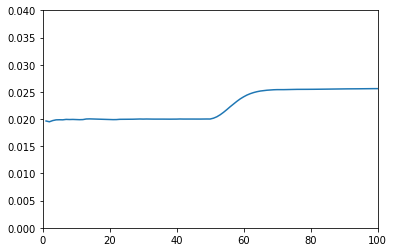

In [15]:
plt.plot(x,y)
plt.axis([0,100,0,0.04])
plt.show()

In [17]:
print(df[199])

[200.        5.47431   1.36824   1.37162]
